In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [38]:
df = pd.read_csv(r'/home/kani/Project/train.csv')
df.head()

,@timestamp,process.executable,process.command_line,process.parent.executable,process.parent.command_line,hash.sha256,hash.imphash,winlog.event_data.Company,command_line_length,fingerprint_command_line
0,"Jul 12, 2021 @ 15:44:14.791",E:\Siemens\Teamcenter12\tcroot\bin\tcserver.exe,E:\Siemens\Teamcenter12\tcroot\bin\tcserver.ex...,E:\Siemens\Teamcenter12\tcroot\pool_manager\Tc...,E:\Siemens\Teamcenter12\tcroot\pool_manager\Tc...,1e4d5845fae63190a8b19ff78b5435cd8c1b6a93fb30bb...,7d0dd387b361c2b27277c039105fc5e8,Siemens Product Lifecycle Management Software ...,119.0,3.292790e+09
1,"Jul 12, 2021 @ 15:44:13.231",C:\Program Files (x86)\Trend Micro\Endpoint Ba...,"""C:\Program Files (x86)\Trend Micro\Endpoint B...",C:\Windows\System32\taskeng.exe,taskeng.exe {CABF6CD8-4720-444F-B7D9-07094F3B4...,8f473506593f4dee6d526d91662ef5086d7fb8c5f25557...,fd261a5ed53e4a37aa933ae59f2b5852,Trend Micro Inc.,87.0,3.106490e+09
2,"Jul 12, 2021 @ 15:44:12.209",C:\Windows\System32\tasklist.exe,tasklist /FO CSV,E:\Siemens\Java\jre1.8.0_202\bin\java.exe,"""e:\Siemens\Java\jre1.8.0_202\bin\java"" -Xmx3...",85cf61445bff8550394308f2cb1d81be7380789b3d90e8...,58bb78ca7598b6bb6eef6e720a50e9bf,Microsoft Corporation,16.0,3.429965e+09
3,"Jul 12, 2021 @ 15:44:11.782",C:\Windows\System32\taskhostw.exe,taskhostw.exe,C:\Windows\System32\svchost.exe,c:\windows\system32\svchost.exe -k netsvcs -p ...,a663253b39c381301f91ea5dc84945793c689595695ef1...,3627be269990d67cf76a03fa55ef9a08,Microsoft Corporation,13.0,1.082081e+09
4,"Jul 12, 2021 @ 15:44:11.660",C:\Windows\System32\gpupdate.exe,gpupdate.exe /target:user,C:\Windows\System32\svchost.exe,c:\windows\system32\svchost.exe -k netsvcs -p ...,b7a3e15d0963d76907602b65c736745d424b6977d4d91f...,76f41d5662b7db99b99adb3406c32e08,Microsoft Corporation,25.0,4.839607e+08


In [39]:
df['label'] = 0
df['label'][21893:] = 1
df.tail()

<ipython-input-39-ac34825625ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][21893:] = 1


,@timestamp,process.executable,process.command_line,process.parent.executable,process.parent.command_line,hash.sha256,hash.imphash,winlog.event_data.Company,command_line_length,fingerprint_command_line,label
22062,"Aug 9, 2021 @ 14:45:59.322",C:\Windows\System32\WUDFHost.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22063,"Aug 9, 2021 @ 14:45:59.233",C:\Windows\System32\rdpclip.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22064,"Aug 9, 2021 @ 14:45:59.229",C:\Windows\System32\LogonUI.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22065,"Aug 9, 2021 @ 14:45:59.225",C:\Windows\System32\AtBroker.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22066,"Aug 9, 2021 @ 14:45:59.031",C:\Windows\System32\TSTheme.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [40]:

import re
#re.sub(r'\W+', '', your_string)
df['data'] = df['process.executable'].map(lambda x: re.sub(r'\W+', ' ', x))         
print(df['data'][10])

C Program Files x86 Trend Micro Apex One PCCSRV Web_OSCE Web CGI cgiRqHotFix exe


In [41]:
df.dtypes

@timestamp                      object
process.executable              object
process.command_line            object
process.parent.executable       object
process.parent.command_line     object
hash.sha256                     object
hash.imphash                    object
winlog.event_data.Company       object
command_line_length            float64
fingerprint_command_line       float64
label                            int64
data                            object
dtype: object

(2150.0, 2270.0)

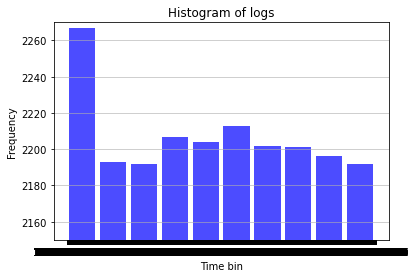

In [27]:
df['time'] = df['@timestamp'].str[-12:]
import matplotlib.pyplot as plt
import numpy as np
import math

n = 10
n, bins, patches = plt.hist(x=df['time'], bins =n,histtype='bar', color='b',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time bin')
plt.ylabel('Frequency')
plt.title('Histogram of logs')

plt.ylim((2150,2270))


In [42]:
list(df.columns.values)

['@timestamp',
 'process.executable',
 'process.command_line',
 'process.parent.executable',
 'process.parent.command_line',
 'hash.sha256',
 'hash.imphash',
 'winlog.event_data.Company',
 'command_line_length',
 'fingerprint_command_line',
 'label',
 'data']

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
tf_idf_vectorizer = TfidfVectorizer(stop_words="english")
tf_idf = tf_idf_vectorizer.fit_transform(df['data'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(df['data'])

print(sentence_vectors.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm = False, smooth_idf = False)
sentence_vectors = vectorizer.fit_transform(df['data'])
print(sentence_vectors.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [90]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(norm = None, n_features = 17)
sentence_vectors = vectorizer.fit_transform(df['data'])
print(sentence_vectors.toarray())

[[ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  0.  0. ...  1.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]]


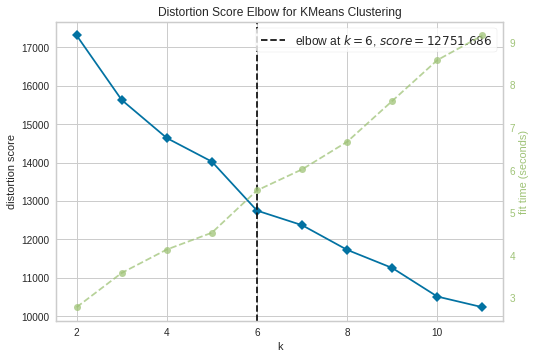

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(tf_idf_array)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=4,max_iter=600,algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

Text(0.5, 1.0, 'Kmeans with 4 clusters')

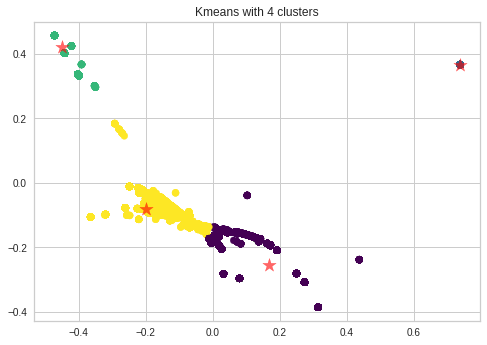

In [100]:
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1],c=prediction,s=50,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.6,marker='*')
plt.title("Kmeans with 4 clusters")

Estimated no. of clusters: 4
Estimated no. of noise points: 20


/home/kani/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

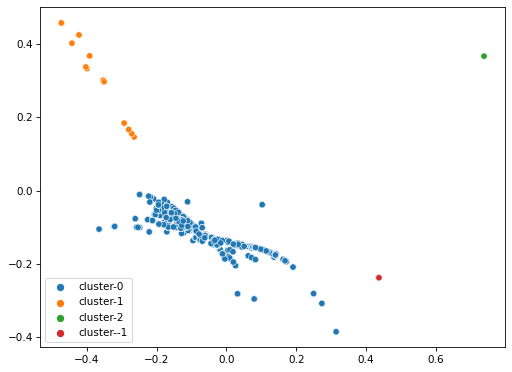

In [48]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

epsilon = 0.15
min_samples = 25

# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Y_sklearn)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

fig = plt.figure(figsize=(8, 6), dpi=75)
sns.scatterplot(Y_sklearn[:,0],Y_sklearn[:,1], hue=["cluster-{}".format(x) for x in labels], sizes=(20, 200), legend="full")


In [103]:

from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(tf_idf_array)
pred = clf.predict(tf_idf_array)
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    19555
-1     2512
Name: anomaly, dtype: int64


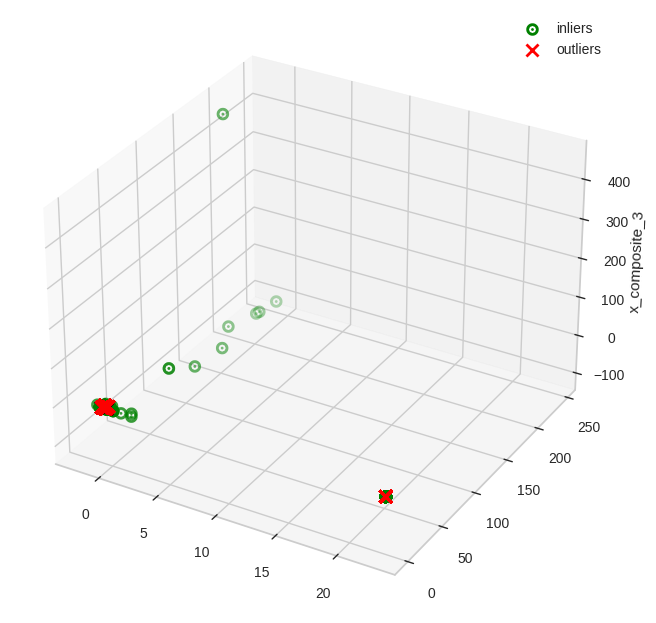

In [105]:
from matplotlib.pyplot import figure


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(tf_idf_array)
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(10, 8), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=7, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=75, marker="x", c="red", label="outliers")
ax.legend()
plt.show()


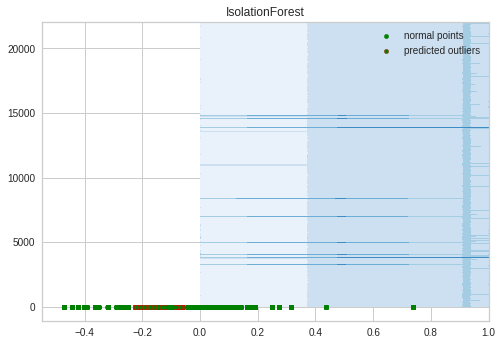

In [135]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(tf_idf_array)
res=pd.DataFrame(pca.transform(tf_idf_array))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [48]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

In [64]:
contamination = 0.1  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test,
    n_features= n_features, 
    contamination=contamination,random_state=1234)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print(type(y_train))

<class 'numpy.ndarray'>


/home/kani/anaconda3/lib/python3.8/site-packages/pyod/utils/data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


In [59]:
len(df['label'].values)

22067

In [60]:
len(tf_idf_array)

22067

In [ ]:
print()

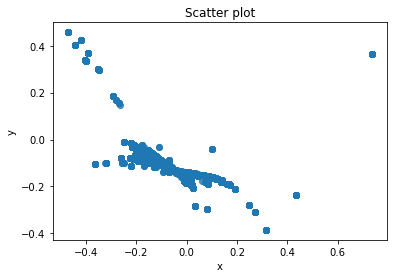

In [73]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(tf_idf_array)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca['PC1'], x_pca['PC2'],alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [74]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25],epochs=25)
clf1.fit(tf_idf_array)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1243)              1546292   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1243)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1243)              1546292   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1243)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 25)                31100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=25,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fa5f416a280>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

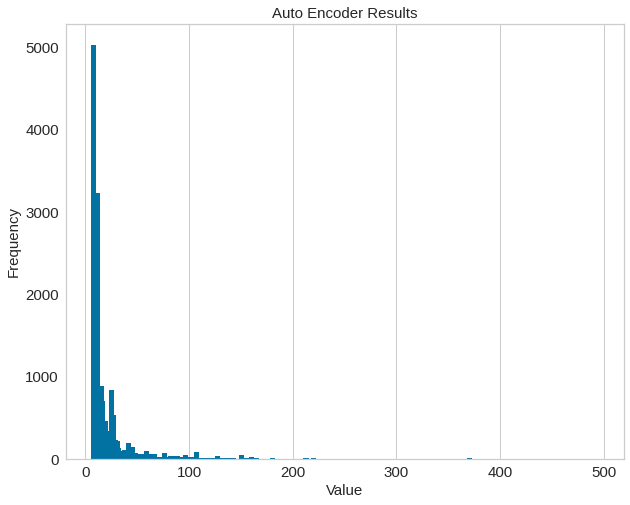

In [101]:
# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_test_scores = clf1.decision_function(tf_idf_array)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
plt.hist(y_test_scores, bins='auto', width = 5)  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Auto Encoder Results',fontsize=15)
plt.show()

In [114]:
pred = clf.predict(Y_sklearn)
resultISF = pd.DataFrame(list(zip(df['data'], pred)),columns =['data', 'prediction'])
resultISF

,data,prediction
0,E Siemens Teamcenter12 tcroot bin tcserver exe,-1
1,C Program Files x86 Trend Micro Endpoint Basec...,1
2,C Windows System32 tasklist exe,1
3,C Windows System32 taskhostw exe,1
4,C Windows System32 gpupdate exe,1
...,...,...
22062,C Windows System32 WUDFHost exe,1
22063,C Windows System32 rdpclip exe,1
22064,C Windows System32 LogonUI exe,1
22065,C Windows System32 AtBroker exe,1


In [115]:
resultISF['prediction'].value_counts()

 1    19433
-1     2634
Name: prediction, dtype: int64

In [117]:
import os
os.getcwd()
resultISF.to_csv('resultISF.csv',index=True)